<a href="https://colab.research.google.com/github/ramank123/PlayStore_WebCrawlers/blob/main/Play_Store_Apps_Review_Analysis_Web_Crawlers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mounting Google Drive to Colab**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing Packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

**Importing CSV file- Play Store Data**

In [ ]:
path= ('/content/drive/MyDrive/AlmaBetter/EDA/Play Store Data.csv')

df_play_store= pd.read_csv(path)

**Importing CSV File - User Reviews Data**

In [ ]:
path= ('/content/drive/MyDrive/AlmaBetter/EDA/User Reviews.csv')
df_user_review= pd.read_csv(path)

**Columns in Play Store Data**

In [ ]:
df_play_store.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

**Shape of Play Store Data**

In [ ]:
df_play_store.shape

(10841, 13)

**Play Store Data - Info**

In [ ]:
df_play_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**Play Store Data - Describe**

In [ ]:
df_play_store.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


**First 10 Rows in Play Store Dataset**

In [ ]:
df_play_store.head(10) 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


**Last 10 Rows in Play Store Dataset**

In [ ]:
df_play_store.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


# **Duplicated Entries in Play Store Data**

**Number of Duplicate Rows in Play Store Data**

In [ ]:
len(df_play_store[df_play_store.duplicated()])

483

In [ ]:
playstore_duplicate= df_play_store[df_play_store.duplicated(keep='last')]

In [ ]:
playstore_duplicate

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
164,Ebook Reader,BOOKS_AND_REFERENCE,4.1,85842,37M,"5,000,000+",Free,0,Everyone,Books & Reference,"June 25, 2018",5.0.6,4.0 and up
192,Docs To Go™ Free Office Suite,BUSINESS,4.1,217730,Varies with device,"50,000,000+",Free,0,Everyone,Business,"April 2, 2018",Varies with device,Varies with device
193,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
204,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
213,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3787,ABC News - US & World News,NEWS_AND_MAGAZINES,4.0,18976,35M,"1,000,000+",Free,0,Everyone 10+,News & Magazines,"June 6, 2018",3.19.11,5.0 and up
3788,NBC News,NEWS_AND_MAGAZINES,4.1,63020,Varies with device,"5,000,000+",Free,0,Everyone 10+,News & Magazines,"February 13, 2018",Varies with device,Varies with device
3790,USA TODAY,NEWS_AND_MAGAZINES,4.1,49259,Varies with device,"5,000,000+",Free,0,Everyone 10+,News & Magazines,"August 2, 2018",Varies with device,Varies with device
3792,CNN Breaking US & World News,NEWS_AND_MAGAZINES,4.0,293080,25M,"10,000,000+",Free,0,Everyone 10+,News & Magazines,"August 6, 2018",5.17,4.4 and up


**Dropping of Duplicate Rows from Play Store Dataset**

In [ ]:
play_store_1= df_play_store.drop_duplicates()
play_store_1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


**Shape of Play Store Dataset after dropping Duplicate Rows**

In [ ]:
play_store_1.shape

(10358, 13)

**Replacing +,$ from '' in Play Store Dataset**

In [ ]:
play_store_2= play_store_1.replace('[+,$]','',regex=True)
play_store_2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,January 7 2018,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,January 15 2018,2.0.0,4.0.3 and up
2,U Launcher Lite – FREE Live Cool Themes Hide Apps,ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,August 1 2018,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,June 8 2018,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,June 20 2018,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,July 25 2017,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,July 6 2018,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000,Free,0,Everyone,Medical,January 20 2017,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17,Books & Reference,January 19 2015,Varies with device,Varies with device


**Shape of User Review Dataset**

In [ ]:
df_user_review.shape

(64295, 5)

**User Review Dataset - Info**

In [ ]:
df_user_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


**First 10 Rows in User Review Dataset**

In [ ]:
df_user_review.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


**Last 10 Rows in User Review Dataset**

In [ ]:
df_user_review.tail(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64285,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64286,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64287,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64288,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64289,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


**Number of Duplicated Rows in User Review Dataset**

In [ ]:
len(df_user_review[df_user_review.duplicated()])

33616

**Duplicate Rows in User Review Dataset**

In [ ]:
user_review_1= (df_user_review[df_user_review.duplicated(keep='last')])
user_review_1

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64289,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
user_review_2= user_review_1.drop_duplicates()
user_review_2

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64112,Hotspot Shield Free VPN Proxy & Wi-Fi Security,Good,Positive,0.70,0.600000
64119,Hotstar,NaN,NaN,NaN,NaN
64156,Hotwire Hotel & Car Rental App,NaN,NaN,NaN,NaN
64202,Housing-Real Estate & Property,NaN,NaN,NaN,NaN


**Overview of Play store Data**

In [ ]:
def playstoredata():
  ps= pd.DataFrame(index=play_store_2.columns)
  ps['DataType'] = play_store_2.dtypes
  ps['Unique_Values'] = play_store_2.nunique()
  ps["Non-null_Values"] = play_store_2.count()
  ps['NaN_Values'] = play_store_2.isnull().sum()
  ps['NaN_Values_Percentage'] = (ps['NaN_Values']/len(play_store_2))*100 
  return ps
playstoredata()

,DataType,Unique_Values,Non-null_Values,NaN_Values,NaN_Values_Percentage
App,object,9653,10358,0,0.000000
Category,object,34,10358,0,0.000000
Rating,float64,40,8893,1465,14.143657
Reviews,object,6002,10358,0,0.000000
Size,object,462,10358,0,0.000000
Installs,object,21,10358,0,0.000000
Type,object,3,10357,1,0.009654
Price,object,93,10358,0,0.000000
Content Rating,object,6,10357,1,0.009654
Genres,object,120,10358,0,0.000000


# **Data Operations of Each Column**

In [ ]:
#cleaning the App Column
play_store_3=play_store_2.drop_duplicates(subset='App', keep='last')
pd.DataFrame(play_store_3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,January 7 2018,1.0.0,4.0.3 and up
2,U Launcher Lite – FREE Live Cool Themes Hide Apps,ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,August 1 2018,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,June 8 2018,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,June 20 2018,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0,Everyone,Art & Design,March 26 2017,1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,July 25 2017,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,July 6 2018,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000,Free,0,Everyone,Medical,January 20 2017,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17,Books & Reference,January 19 2015,Varies with device,Varies with device


In [ ]:
#cleaning the Category column
pd.DataFrame(play_store_3['Category'].value_counts(ascending=True)).head(10)

,Category
1.9,1
BEAUTY,53
COMICS,56
PARENTING,60
ART_AND_DESIGN,61
EVENTS,64
HOUSE_AND_HOME,73
WEATHER,79
ENTERTAINMENT,79
LIBRARIES_AND_DEMO,84


In [ ]:
play_store_3[play_store_3['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,1000,Free,0,Everyone,NaN,February 11 2018,1.0.19,4.0 and up,NaN


In [ ]:
#data have entry mistake not matching parameters with other all data so deleting index 10472 from dataframe
play_store_3 = play_store_3.drop(10472) 

In [ ]:
#clenning Rating column
play_store_3['Rating'].unique()

array([4.1, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 3.9, 4.9,
       3.6, 3.7, nan, 3.3, 3.4, 3.5, 3.1, 5. , 2.5, 2.8, 3. , 2.7, 1. ,
       1.9, 2.9, 2.6, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [ ]:
play_store_3['Rating'].isnull().sum() #checking null values

1464

In [ ]:
x=play_store_3.Rating.median()
play_store_3.Rating.fillna(x,inplace=True)
play_store_3.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [ ]:
play_store_3['Rating'] = play_store_3['Rating'].astype('float64') 
play_store_3['Rating'].dtype

dtype('float64')

In [ ]:
play_store_3['Rating'].unique()

array([4.1, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 3.9, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.5, 2.8, 3. , 2.7, 1. , 1.9,
       2.9, 2.6, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [ ]:
#cleaning Review column
play_store_3['Reviews'].unique()

array(['159', '87510', '215644', ..., '603', '1195', '398307'],
      dtype=object)

In [ ]:
play_store_3['Reviews'] = play_store_3['Reviews'].astype('int')
play_store_3['Reviews'].dtype
play_store_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9652 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9652 non-null   object 
 1   Category        9652 non-null   object 
 2   Rating          9652 non-null   float64
 3   Reviews         9652 non-null   int64  
 4   Size            9652 non-null   object 
 5   Installs        9652 non-null   object 
 6   Type            9651 non-null   object 
 7   Price           9652 non-null   object 
 8   Content Rating  9652 non-null   object 
 9   Genres          9652 non-null   object 
 10  Last Updated    9652 non-null   object 
 11  Current Ver     9644 non-null   object 
 12  Android Ver     9650 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.0+ MB


In [ ]:
#Cleaning Installs Column
play_store_3['Installs']=play_store_3['Installs'].astype('int')
play_store_3['Installs'].isnull().sum()
play_store_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9652 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9652 non-null   object 
 1   Category        9652 non-null   object 
 2   Rating          9652 non-null   float64
 3   Reviews         9652 non-null   int64  
 4   Size            9652 non-null   object 
 5   Installs        9652 non-null   int64  
 6   Type            9651 non-null   object 
 7   Price           9652 non-null   object 
 8   Content Rating  9652 non-null   object 
 9   Genres          9652 non-null   object 
 10  Last Updated    9652 non-null   object 
 11  Current Ver     9644 non-null   object 
 12  Android Ver     9650 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 1.0+ MB


In [ ]:
play_store_3['Installs'].min(),play_store_3['Installs'].max()

(0, 1000000000)

In [ ]:
#As we can notice,there is a high variance in the number of installs. 
#To remove this we are adding a new column to dataframe, which is the log of number of installs
play_store_3['log_installs'] = np.log10(play_store_3['Installs'])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
#cleaning Type Column
play_store_3['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [ ]:
play_store_3[play_store_3.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,log_installs
9148,Command & Conquer: Rivals,FAMILY,4.3,0,Varies with device,0,NaN,0,Everyone 10,Strategy,June 28 2018,Varies with device,Varies with device,-inf


In [ ]:
play_store_3.loc[9148, 'Type'] = 'Free' #converting null value into Free Type
play_store_3.loc[9148]

App               Command & Conquer: Rivals
Category                             FAMILY
Rating                                  4.3
Reviews                                   0
Size                     Varies with device
Installs                                  0
Type                                   Free
Price                                     0
Content Rating                  Everyone 10
Genres                             Strategy
Last Updated                   June 28 2018
Current Ver              Varies with device
Android Ver              Varies with device
log_installs                           -inf
Name: 9148, dtype: object

In [ ]:
play_store_3['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [ ]:
#cleaning Size Column
play_store_3['Size'].unique()

array(['19M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M', '28M',
       '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M', '31M',
       '14M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '24M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '8.4M', '118k', '44M', '695k', '1.6M', '18k', '53M',
     

In [ ]:
#Removing "M", Changing Size To KB
play_store_3['Size'] = play_store_3['Size'].map(lambda value :str(int(float(value.rstrip('M')) * 1024)) if value[-1] == 'M' else value)

# Removing "k"
play_store_3['Size'] = play_store_3['Size'].map(lambda value :str(value.rstrip('k')) if value[-1] == 'k' else value)

# Setting "Varies with device" to NaN
play_store_3['Size'] = play_store_3['Size'].map(lambda value : np.nan if value == 'Varies with device' else value)

In [ ]:
play_store_3["Size"].unique()

array(['19456', '8908', '25600', '2867', '5734', '29696', '33792', '3174',
       '28672', '12288', '20480', '21504', '37888', '2764', '5632',
       '17408', '39936', '31744', '14336', '4300', '23552', '6144',
       '6246', '4710', '9420', '5324', '11264', nan, '9625', '15360',
       '10240', '1228', '24576', '26624', '8192', '8089', '57344',
       '58368', '35840', '55296', '201', '3686', '5836', '8806', '2457',
       '27648', '2560', '7168', '16384', '3481', '9113', '3993', '2969',
       '38912', '32768', '5529', '18432', '1126', '2252', '4608', '10035',
       '53248', '9216', '6860', '30720', '2662', '7270', '3788', '22528',
       '7577', '6553', '3276', '8396', '10137', '5017', '9728', '5120',
       '6041', '13312', '74752', '6963', '3584', '4096', '2355', '7372',
       '2150', '43008', '7475', '9318', '56320', '23', '6656', '1536',
       '7680', '52224', '41984', '49152', '8704', '47104', '8499', '4403',
       '4812', '3379', '40960', '7987', '9011', '6758', '5222', '6

In [ ]:
play_store_3['Size']=play_store_3['Size'].astype('float') 
play_store_3['Size'].replace([np.nan], play_store_3['Size'].median(), inplace=True)
play_store_3['Size'].isnull().sum()

0

In [ ]:
#cleaning Price Column
play_store_3['Price'].unique()

array(['0', '4.99', '3.99', '1.49', '2.99', '7.99', '3.49', '1.99',
       '5.99', '6.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '11.99', '79.99', '16.99', '14.99', '1.00', '29.99', '2.49',
       '24.99', '10.99', '1.50', '19.99', '15.99', '33.99', '74.99',
       '39.99', '4.49', '1.70', '8.99', '2.00', '3.88', '25.99', '399.99',
       '17.99', '400.00', '3.02', '1.76', '4.84', '4.77', '1.61', '2.50',
       '1.59', '6.49', '1.29', '5.00', '13.99', '299.99', '379.99',
       '37.99', '18.99', '389.99', '19.90', '8.49', '1.75', '14.00',
       '4.85', '46.99', '109.99', '3.95', '154.99', '3.08', '2.59',
       '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04', '12.99',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [ ]:
play_store_3['Price'] = play_store_3['Price'].astype('float64')
play_store_3['Price'] = play_store_3['Price'].apply(pd.to_numeric, errors='coerce') 
play_store_3['Price'].dtype

dtype('float64')

In [ ]:
#Cleaning Content Rating Column
play_store_3['Content Rating'].value_counts()


Everyone          7898
Teen              1035
Mature 17          392
Everyone 10        322
Adults only 18       3
Unrated              2
Name: Content Rating, dtype: int64

In [ ]:
play_store_3['Content Rating'].isnull().sum()

0

In [ ]:
#Cleaning Android Version
androidverion_count=pd.value_counts(play_store_3['Android Ver'],sort=True)
androidverion_count

4.1 and up            2203
4.0.3 and up          1394
4.0 and up            1285
Varies with device     989
4.4 and up             818
2.3 and up             614
5.0 and up             511
4.2 and up             371
2.3.3 and up           273
2.2 and up             239
3.0 and up             229
4.3 and up             221
2.1 and up             133
1.6 and up             116
6.0 and up              54
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [ ]:
#Cleaning Last Played Column
play_store_3['Last Updated'] = pd.to_datetime(play_store_3['Last Updated'])
play_store_3['Last Updated']

0       2018-01-07
2       2018-08-01
3       2018-06-08
4       2018-06-20
5       2017-03-26
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 9652, dtype: datetime64[ns]

In [ ]:
play_store_3['LastUpdated_Day']=play_store_3['Last Updated'].dt.day
play_store_3['LastUpdated_Month']=play_store_3['Last Updated'].dt.month
play_store_3['LastUpdated_Year']=play_store_3['Last Updated'].dt.year
play_store_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9652 entries, 0 to 10840
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   App                9652 non-null   object        
 1   Category           9652 non-null   object        
 2   Rating             9652 non-null   float64       
 3   Reviews            9652 non-null   int64         
 4   Size               9652 non-null   float64       
 5   Installs           9652 non-null   int64         
 6   Type               9652 non-null   object        
 7   Price              9652 non-null   float64       
 8   Content Rating     9652 non-null   object        
 9   Genres             9652 non-null   object        
 10  Last Updated       9652 non-null   datetime64[ns]
 11  Current Ver        9644 non-null   object        
 12  Android Ver        9650 non-null   object        
 13  log_installs       9652 non-null   float64       
 14  LastUpd

**Overview of User Review Dataset**

In [ ]:
def userreviewdata():
  us= pd.DataFrame(index=user_review_2.columns)
  us['DataType'] = user_review_2.dtypes
  us['Unique_Values'] = user_review_2.nunique()
  us["Non-null_Values"] = user_review_2.count()
  us['NaN_Values'] = user_review_2.isnull().sum()
  us['NaN_Values_Percentage'] = (us['NaN_Values']/len(play_store_2))*100 
  return us
userreviewdata()

,DataType,Unique_Values,Non-null_Values,NaN_Values,NaN_Values_Percentage
App,object,956,6352,0,0.000000
Translated_Review,object,5191,5438,914,8.824097
Sentiment,object,3,5438,914,8.824097
Sentiment_Polarity,float64,1919,5438,914,8.824097
Sentiment_Subjectivity,float64,1662,5438,914,8.824097


## **Filtering of User Reviews Data Set**

In [ ]:
#dropped the rows having all null values
user_review_3 = user_review_2.dropna(subset=["Translated_Review"],how="all")
user_review_3.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

# ***Exploratory Data Analysis and Data Visualization***

**Application Types in Play Store**

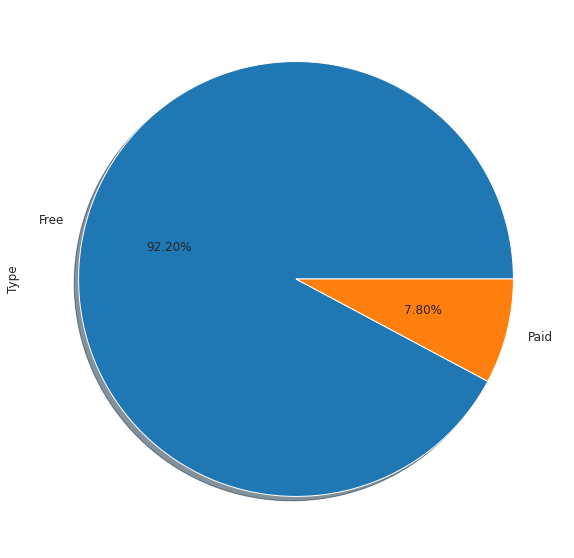

In [ ]:
# application type distribution
plt.figure(figsize=(15,10))
pd.value_counts(play_store_3["Type"]).plot(kind = 'pie',  autopct='%1.2f%%', shadow=True)
plt.show()

**Summary:**

**1. 7.80% Apps in Play Store Dataset are Paid** 

**2. 92.20% Apps in Play Store Dataset are Free** 

**Categories in Play Store**

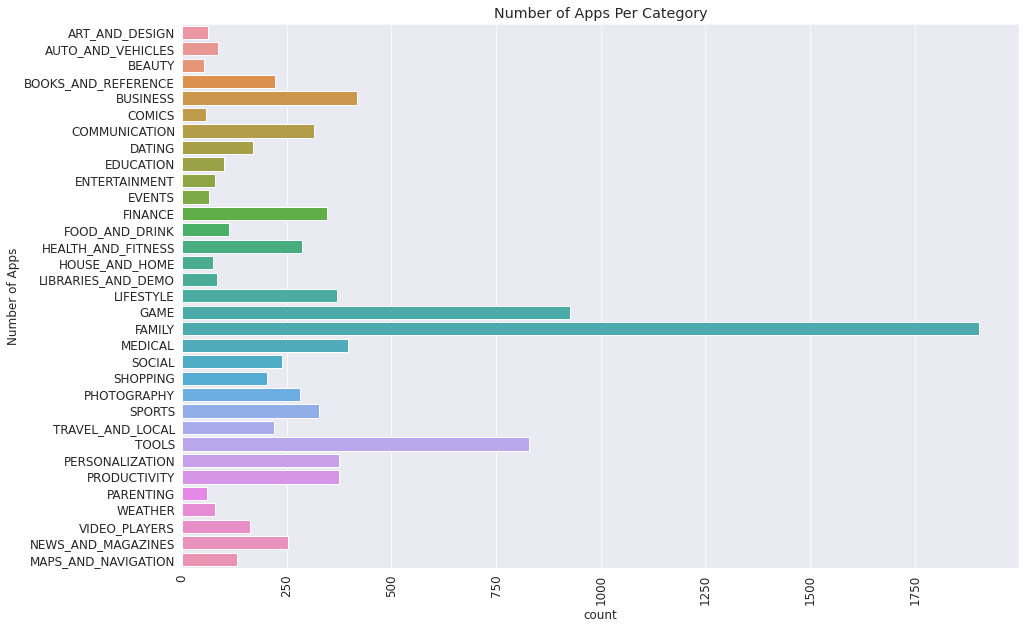

In [ ]:
# get the number of apps for each category
sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
sns.countplot(y='Category', data=play_store_3)
plt.title('Number of Apps Per Category')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

**Summary:**
**Top Three Category in Apps are Family, Games and Tools** 

**how many apps were installed according to its type?**

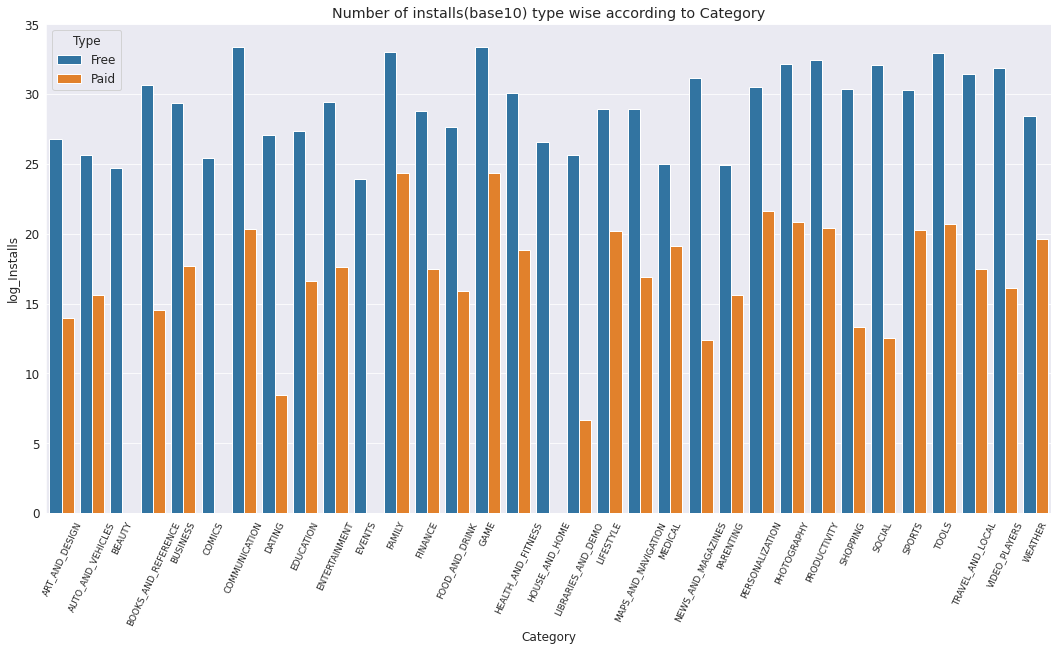

In [ ]:
play_store_3['Gaming Category App'] = play_store_3['Category']=='GAME'
categoty_type_installs = play_store_3.groupby(['Category','Type'])[['Installs']].sum().reset_index()
categoty_type_installs['log_Installs'] = np.log2(categoty_type_installs['Installs'])
plt.figure(figsize=(18,9))
plt.xticks(rotation=65,fontsize=9)
plt.xlabel("Category")
plt.ylabel("Installs(base10)")
plt.title("Number of installs(base10) type wise according to Category")
sns.barplot(x='Category', y='log_Installs', hue='Type', data=categoty_type_installs);
plt.show()

**Genres in Play Store**

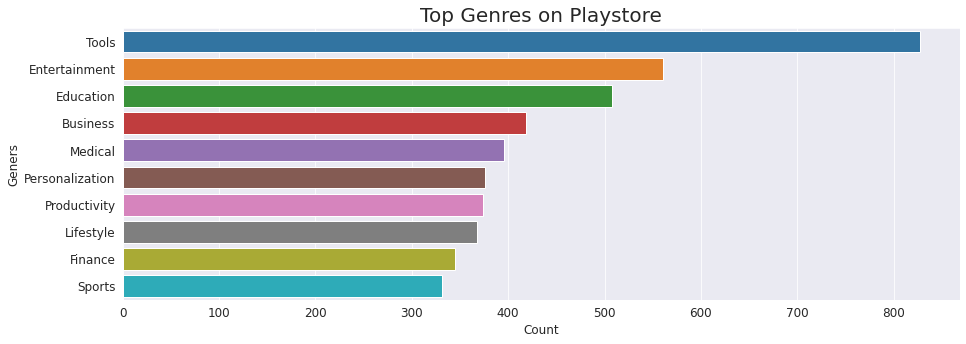

In [ ]:
# get the number of apps for each category
y = play_store_3['Genres'].value_counts().index
x = play_store_3['Genres'].value_counts().head(10)
xsisG = []
ysisG = []
for i in range(len(x)):
    xsisG.append(x[i])
    ysisG.append(y[i])

plt.figure(figsize=(15,5))
plt.xlabel("Count")
plt.ylabel("Geners")

graph = sns.barplot(x = xsisG, y = ysisG,)
graph.set_title("Top Genres on Playstore", fontsize = 20);

**Summary:**
**Tools, Entertainment and Education are Top 3 Genres in Play Store Dataset**

**Number of App installs for each category**

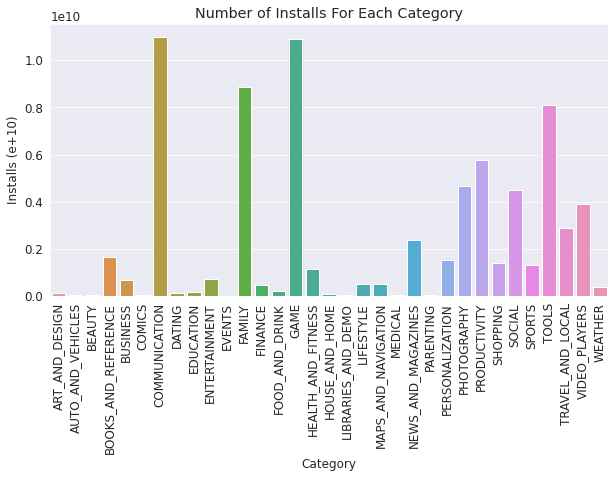

In [ ]:
# get the number of installs for each category
categories = play_store_3.groupby('Category')
category_installs_sum_df = categories[['Installs']].sum()
category_installs_sum_df = category_installs_sum_df.reset_index()  # to convert groupby object into dataframe

plt.figure(figsize=(10, 5))
sns.barplot(x='Category', y='Installs', data=category_installs_sum_df)
plt.xticks(rotation=90)
plt.ylabel('Installs (e+10)')
plt.title('Number of Installs For Each Category')
plt.show()

**Summary:**

**Communication, Game and Family category are in Top 3 having maximum** **Installation respectively**.

**Count of each application in each category differentiated by their type**

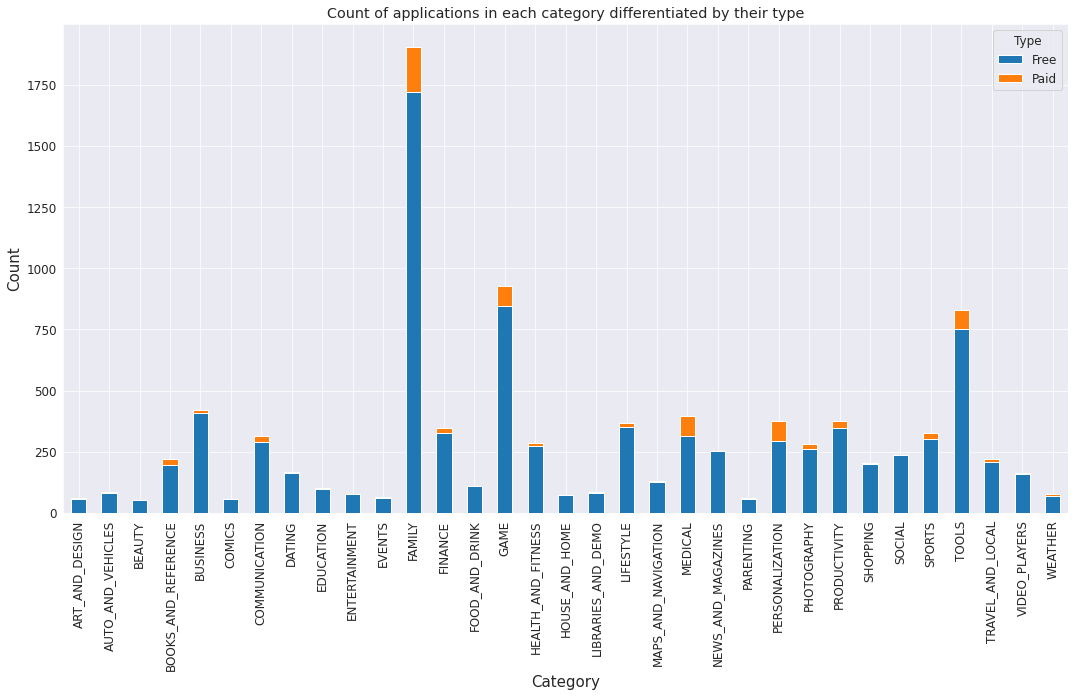

In [ ]:
app_count = play_store_3.groupby(['Category','Type'])[['App']].count().reset_index().rename(columns={'App':'Count','index':'App'})
df_app_count = app_count.pivot('Category', 'Type', 'Count').fillna(0).reset_index()
df_app_count.set_index('Category').plot(kind='bar', stacked=True, figsize=(18,9))
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Count of applications in each category differentiated by their type")
plt.show()

**Summary:** 

**Family, Game and Tools Category have maximum number of Free and Paid Apps respectively**


**Size of Apps**

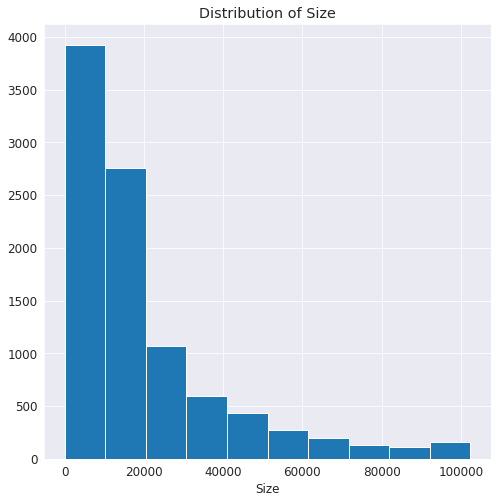

In [ ]:
play_store_3.loc[play_store_3['Size'].isnull(),'Size']=0
plt.xlabel("Size")
plt.title("Distribution of Size")
plt.hist(play_store_3['Size']);
plt.show()

**Summary:**

**Size of Maximum number of Apps are in the Range of 0 KB to 2000 KB**  

**How does size impact on the number of installs?**

In [ ]:
play_store_3['Size'] = play_store_3['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
play_store_3['Size'] = play_store_3['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
play_store_3['Size'] = play_store_3['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
play_store_3['Size'] = play_store_3['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
play_store_3['Size'] = play_store_3['Size'].apply(lambda x: float(x))

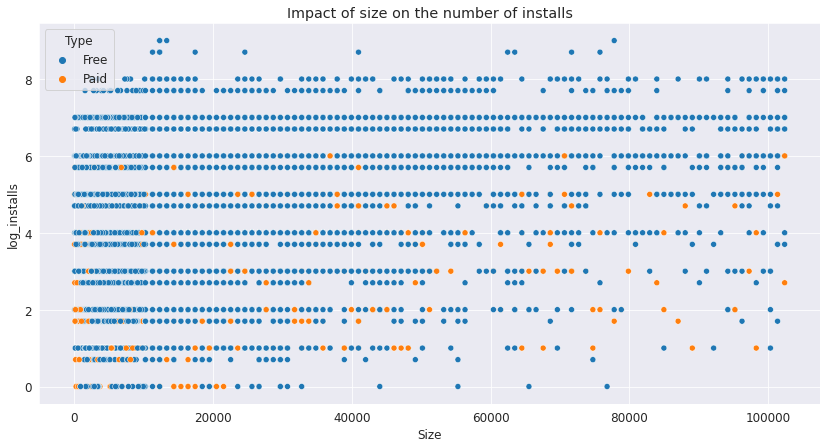

In [ ]:
plt.figure(figsize=(14,7))
plt.title("Impact of size on the number of installs")
sns.scatterplot(x= play_store_3['Size'], y= play_store_3['log_installs'], hue=play_store_3['Type'])
plt.show()

### **Distribution of app ratings**

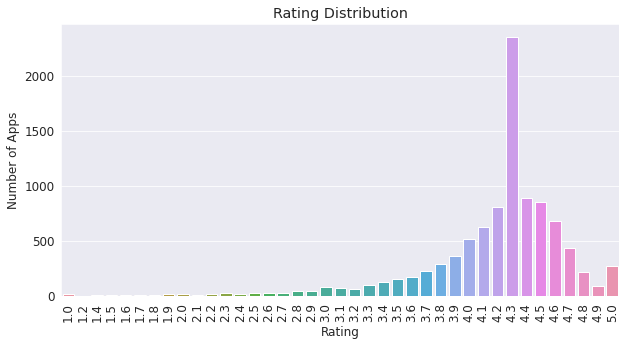

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Rating', data=play_store_3)
plt.title('Rating Distribution')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

### **Number of installs per rating**

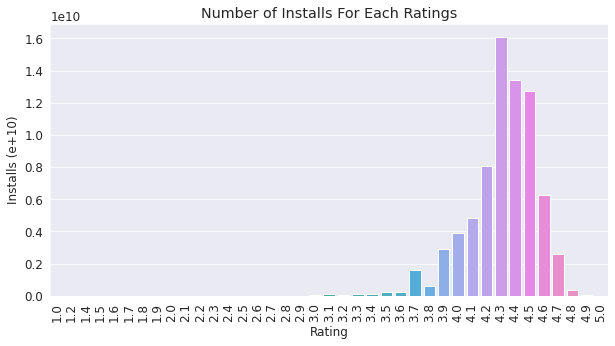

In [ ]:
ratings = play_store_3.groupby('Rating')
ratings_installs_sum_df = ratings[['Installs']].sum()
ratings_installs_sum_df = ratings_installs_sum_df.reset_index()  # to convert groupby object into dataframe

plt.figure(figsize=(10, 5))
sns.barplot(x='Rating', y='Installs', data=ratings_installs_sum_df)
plt.xticks(rotation=90)
plt.ylabel('Installs (e+10)')
plt.title('Number of Installs For Each Ratings')
plt.show()

**Summary:**

**Ratings of 4.3, 4.4 & 4.5 have maximum number of installation.**

### **How does size impact the ratings of any app?**

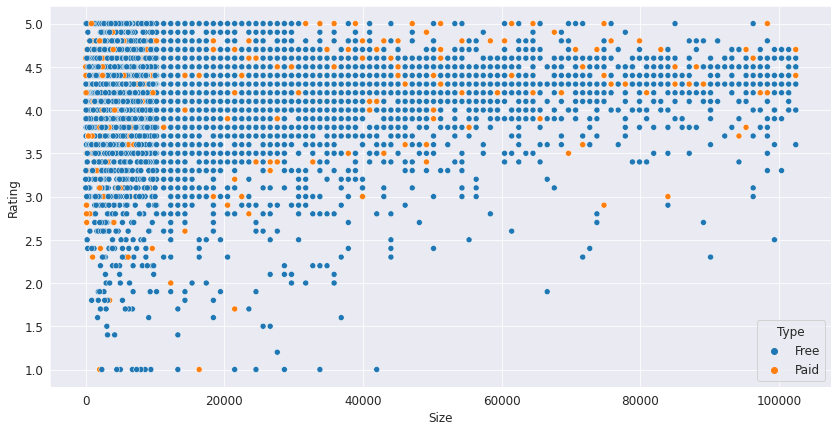

In [ ]:
plt.figure(figsize=(14,7))
sns.scatterplot(x= play_store_3['Size'], y= play_store_3['Rating'], hue=play_store_3['Type'])
plt.show()

### **What is the distribution of apps in terms of their ratings, size and type?**

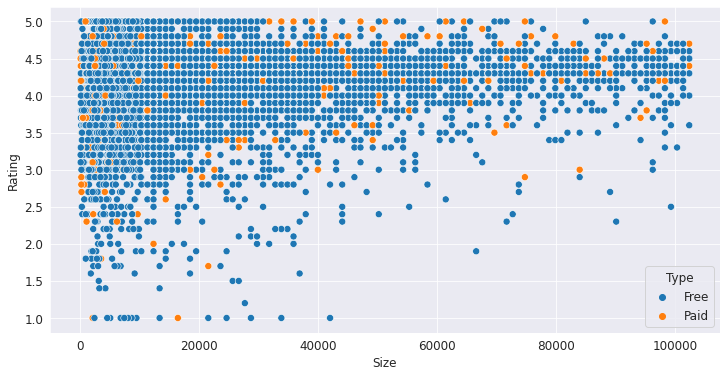

In [ ]:
# show the distribution of apps in term of their rating, size and type
plt.figure(figsize=(12, 6))
sns.scatterplot(x= play_store_3['Size'], y= play_store_3['Rating'], hue=play_store_3['Type'], s=50)

### How sentiment is divided for different type of reviews?

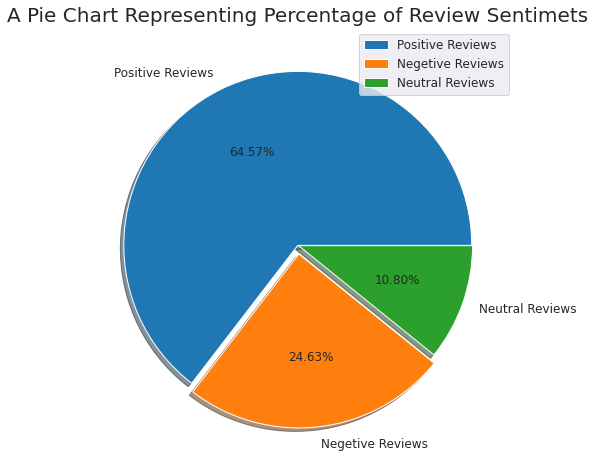

In [ ]:
merged_df = play_store_3.merge(user_review_2, on="App")
counts = list(merged_df['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negetive Reviews','Neutral Reviews'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(counts, labels=labels, explode=[0, 0.05, 0.005], shadow=True, autopct="%.2f%%")
plt.title('A Pie Chart Representing Percentage of Review Sentimets', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

### **What is the distribution of type of reviews, categorywise in the data set?**

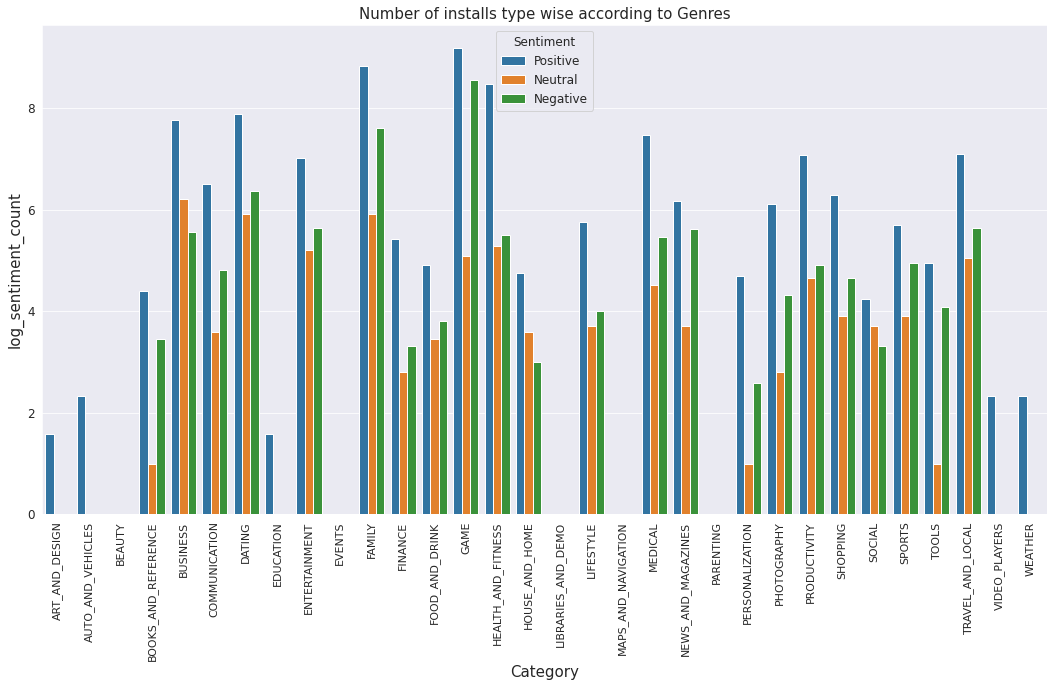

In [ ]:
category_sentiment = merged_df.groupby(['Category','Sentiment']).size().reset_index(name='Sentiment Count')
category_sentiment['log_sentiment_count'] = np.log2(category_sentiment['Sentiment Count'])
plt.figure(figsize=(18,9))
plt.xticks(rotation=90,fontsize=11)
plt.xlabel("Category", fontsize=15)
plt.ylabel("Installs", fontsize=15)
plt.title("Number of installs type wise according to Genres",fontsize=15)
sns.barplot(x='Category', y='log_sentiment_count', hue='Sentiment', data=category_sentiment);

### Distribution of subjectivity

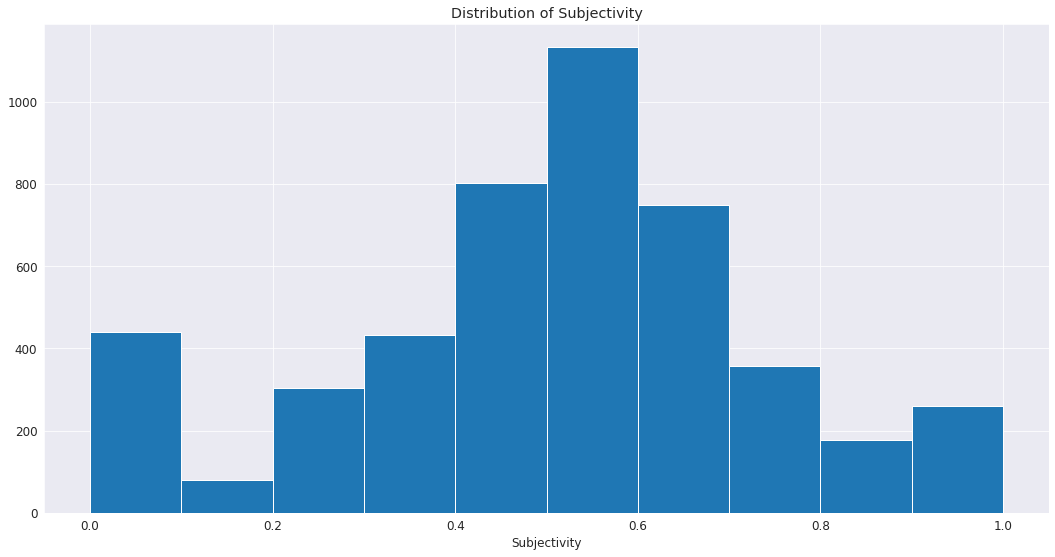

In [ ]:
plt.figure(figsize=(18,9))
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(merged_df[merged_df['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'])
plt.show()

### Is sentiment subjectivity proportional to sentiment polarity?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


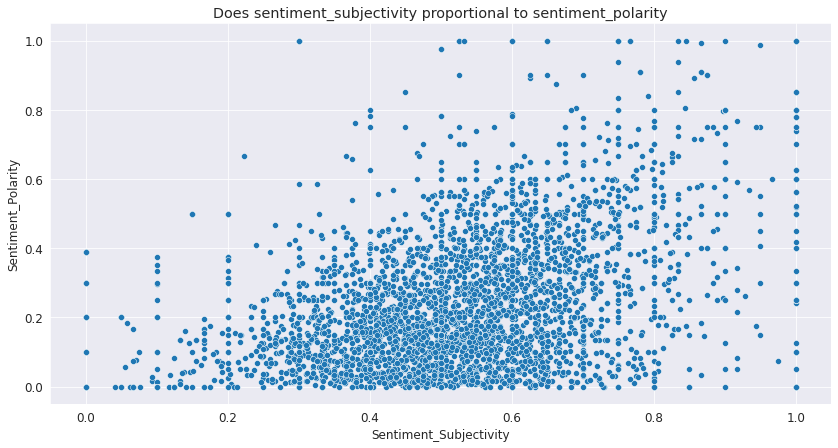

In [ ]:
sentimet_subjectivity_polarity = merged_df.groupby(['Category'])['Sentiment_Polarity','Sentiment_Subjectivity'].mean().reset_index().rename(columns={'Sentiment_Polarity':'Sentiment_polarity_avg','Sentiment_Subjectivity':'sentiment_subjectivity_avg'})
merged_df['Sentiment_Subjectivity'] = merged_df['Sentiment_Subjectivity'].abs()
merged_df['Sentiment_Polarity'] = merged_df['Sentiment_Polarity'].abs()
plt.figure(figsize=(14,7))
sns.scatterplot(x=merged_df['Sentiment_Subjectivity'], y=merged_df['Sentiment_Polarity'])
plt.title("Does sentiment_subjectivity proportional to sentiment_polarity")
plt.show()

### **Age vs sentiment: each age with its Positive,Negative,Nauteral sentiment**

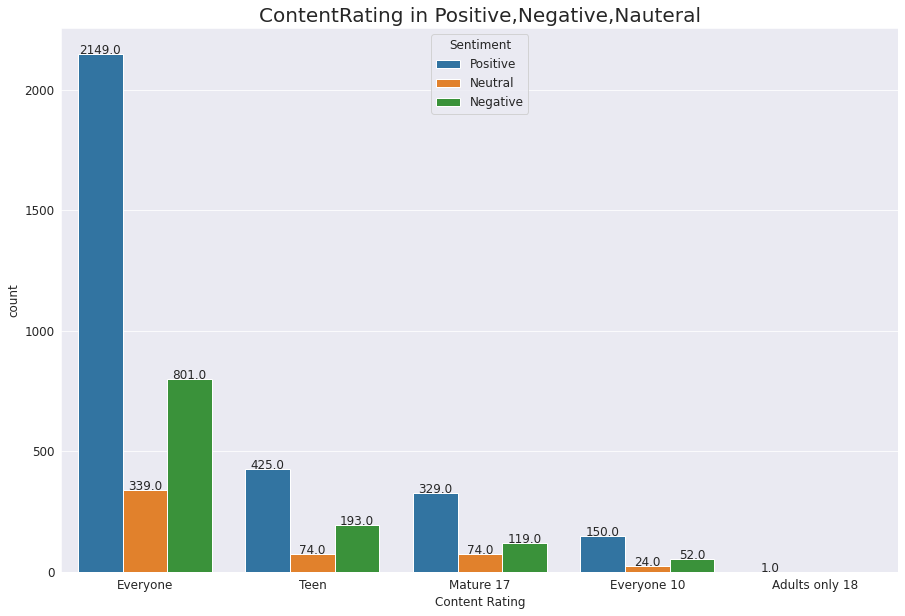

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x= merged_df["Content Rating"],hue=merged_df['Sentiment']);
plt.title("ContentRating in Positive,Negative,Nauteral",size=20)

for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 12)

plt.show()

### **Sentiment_Polarity relation with paid and Free App**

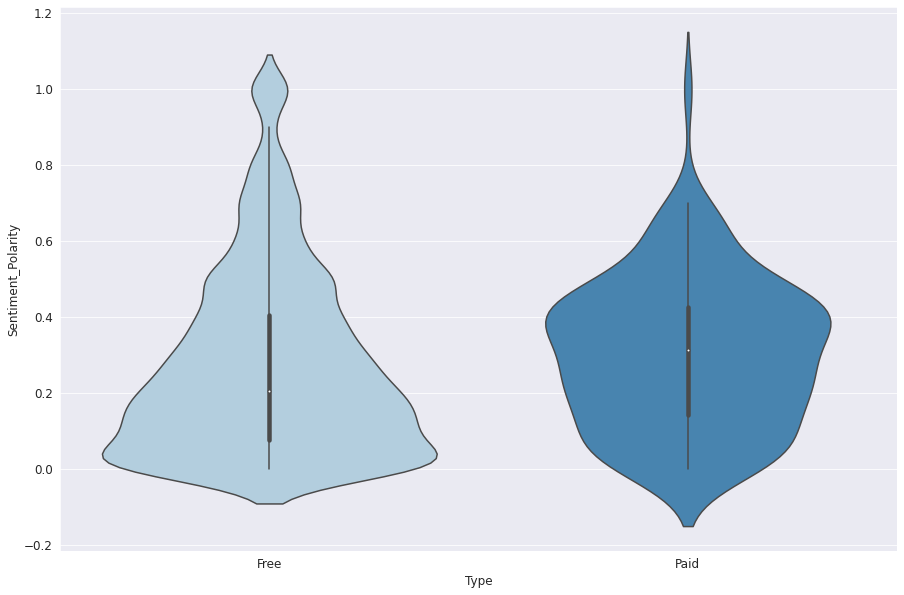

In [ ]:
plt.figure(figsize=(15,10))
sns.violinplot(y = merged_df["Sentiment_Polarity"],x = merged_df["Type"],palette="Blues" )
plt.show()

### **Content Rating Relation with Sebtiment Polarity**

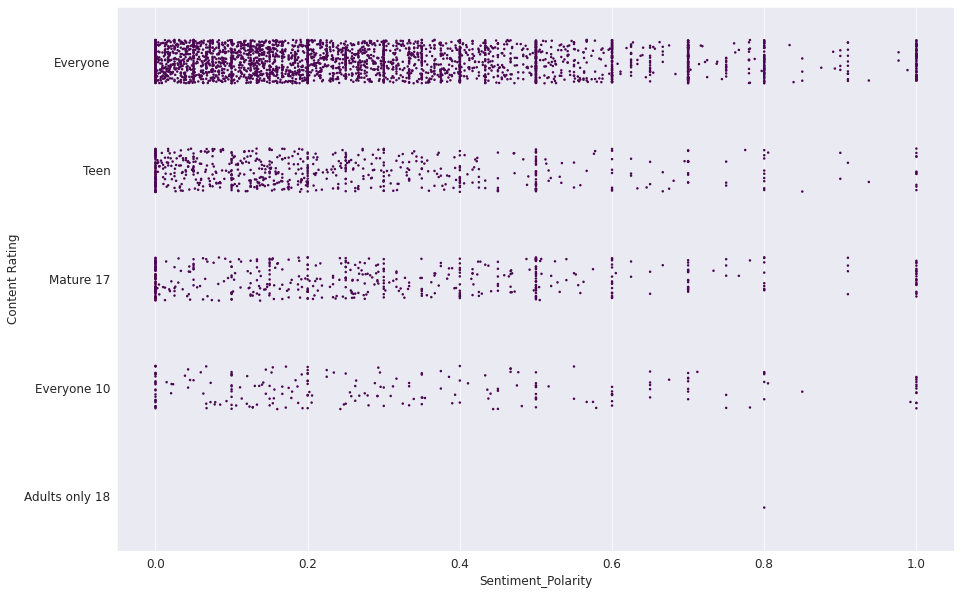

In [ ]:
plt.figure(figsize=(15,10))

ax = sns.stripplot(y = merged_df["Content Rating"], x = merged_df["Sentiment_Polarity"], data=merged_df, color="#4B0751", jitter=0.2, size=2.5)

plt.show()

### **Categories Relation with Sentiment_Subjectivity**

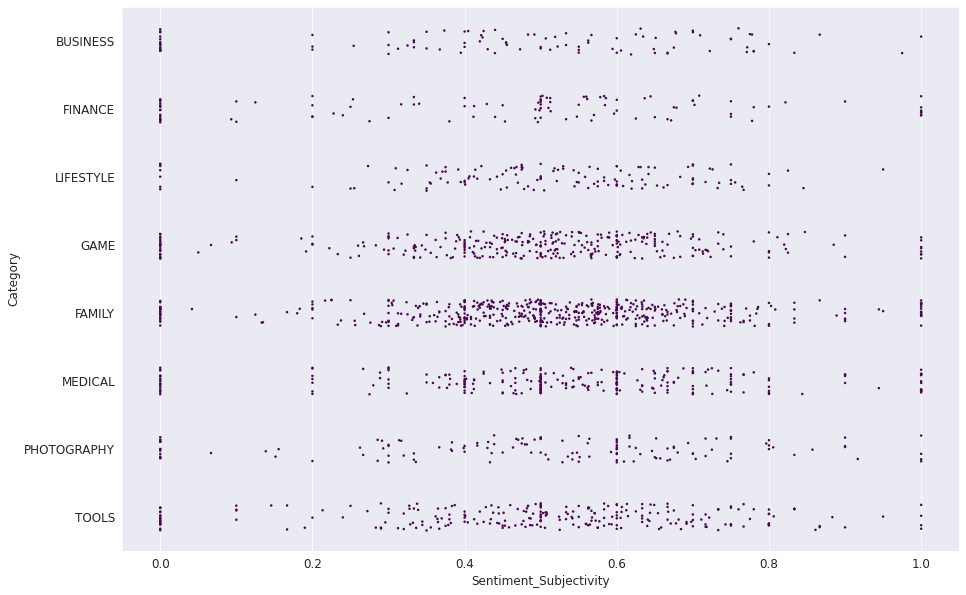

In [ ]:
plt.figure(figsize=(15,10))
# Select a few popular app categories
popular_app_cats = play_store_3[play_store_3.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE','LIFESTYLE','BUSINESS'])]

ax = sns.stripplot(y = popular_app_cats['Category'], x = merged_df["Sentiment_Subjectivity"], data=merged_df, color="#4B0751", jitter=0.2, size=2.5)

plt.show()


### **A quick look on reviews through Wordcloud**

In [ ]:
from wordcloud import  WordCloud, STOPWORDS, ImageColorGenerator

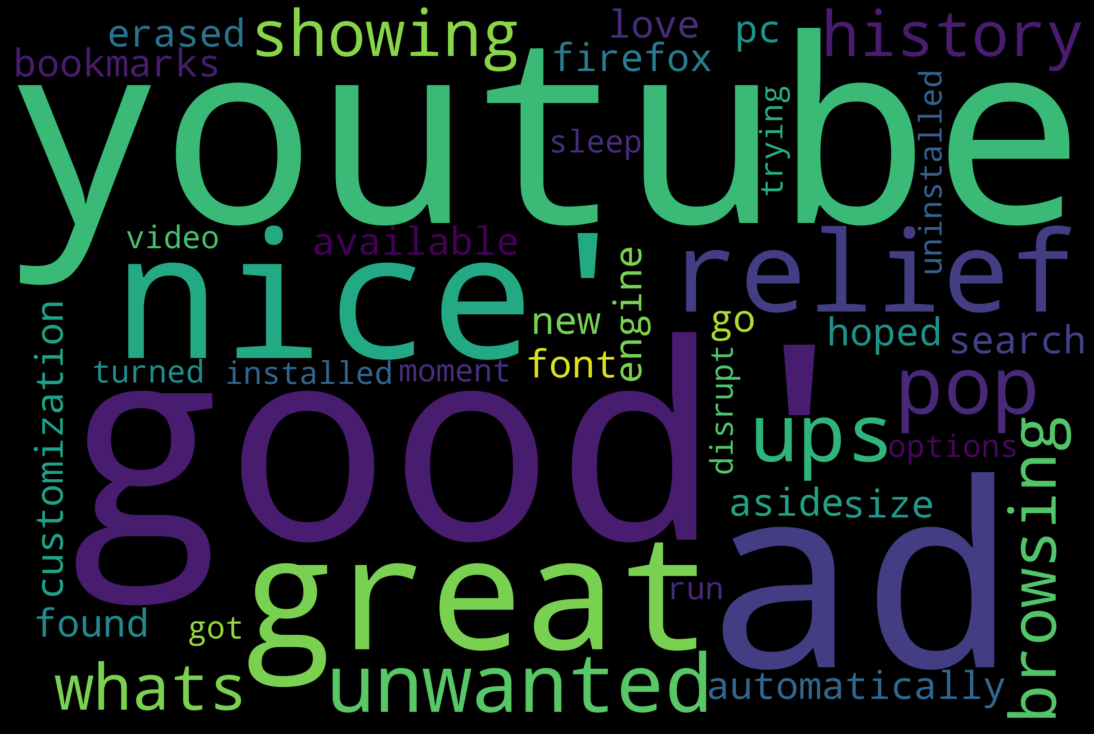

In [ ]:
review_notnull = merged_df[merged_df['Translated_Review'].notnull()]
text = review_notnull.Translated_Review.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text).lower())
fig = plt.figure(
    figsize = (15, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### **Asking and Answering Questions**

In [ ]:
# 1. What is the top 5 apps on the basis of installs?
df = play_store_3.sort_values(by=['Installs'], ascending=False)
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,log_installs,LastUpdated_Day,LastUpdated_Month,LastUpdated_Year,Gaming Category App
3232,Google Street View,TRAVEL_AND_LOCAL,4.2,2129707,12288.0,1000000000,Free,0.0,Everyone,Travel & Local,2018-08-06,Varies with device,Varies with device,9.0,6,8,2018,False
3909,Instagram,SOCIAL,4.5,66509917,12288.0,1000000000,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device,9.0,31,7,2018,False
3687,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,12288.0,1000000000,Free,0.0,Teen,Video Players & Editors,2018-08-06,Varies with device,Varies with device,9.0,6,8,2018,False
5395,Google Photos,PHOTOGRAPHY,4.5,10847682,12288.0,1000000000,Free,0.0,Everyone,Photography,2018-08-01,Varies with device,Varies with device,9.0,1,8,2018,False
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,12288.0,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,9.0,3,8,2018,False


In [ ]:
print(f'The 5 apps with the most number of installs are: {", ".join(df["App"].head(5))}')

The 5 apps with the most number of installs are: Google Street View, Instagram, Google Play Movies & TV, Google Photos, WhatsApp Messenger


In [ ]:
# 2. What is the top 5 reviewed apps?
df = play_store_3.groupby(by=['App', 'Category', 'Rating'])[['Reviews']].sum().reset_index()
df = df.sort_values(by=['Reviews'], ascending=False)
df.head(5)

,App,Category,Rating,Reviews
4325,Facebook,SOCIAL,4.1,78128208
9034,WhatsApp Messenger,COMMUNICATION,4.4,69109672
5395,Instagram,SOCIAL,4.5,66509917
6161,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578
2561,Clash of Clans,FAMILY,4.6,44881447


In [ ]:
print(f'The 5 apps that have the most number of total reviews are: {", ".join(df["App"].head(5))}')

The 5 apps that have the most number of total reviews are: Facebook, WhatsApp Messenger, Instagram, Messenger – Text and Video Chat for Free, Clash of Clans


In [ ]:
# 3. What is the top 5 expensive apps?
df = play_store_3.sort_values(by=['Price'], ascending=False)
df.head(5)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,log_installs,LastUpdated_Day,LastUpdated_Month,LastUpdated_Year,Gaming Category App
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7475.0,10000,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up,4.00000,3,5,2018,False
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,2017-05-01,3.4,4.4 and up,3.69897,1,5,2017,False
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,4.3,0,40960.0,0,Paid,399.99,Everyone,Lifestyle,2017-12-01,MONEY,4.1 and up,-inf,1,12,2017,False
5354,I am Rich Plus,FAMILY,4.0,856,8908.0,10000,Paid,399.99,Everyone,Entertainment,2018-05-19,3.0,4.4 and up,4.00000,19,5,2018,False
5358,I am Rich!,FINANCE,3.8,93,22528.0,1000,Paid,399.99,Everyone,Finance,2017-12-11,1.0,4.1 and up,3.00000,11,12,2017,False


In [ ]:
print(f'The top 5 most expensive apps in the store are: {", ".join(df["App"].head(5))}')

The top 5 most expensive apps in the store are: I'm Rich - Trump Edition, I am rich(premium), I'm Rich/Eu sou Rico/أنا غني/我很有錢, I am Rich Plus, I am Rich!


In [ ]:
# 4. What is the top 3 most installed apps in Game category?
df = play_store_3[play_store_3['Category'] == 'GAME']
df = df.sort_values(by=['Installs'], ascending=False)
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,log_installs,LastUpdated_Day,LastUpdated_Month,LastUpdated_Year,Gaming Category App
3896,Subway Surfers,GAME,4.5,27711703,77824.0,1000000000,Free,0.0,Everyone 10,Arcade,2018-07-12,1.90.0,4.1 and up,9.00000,12,7,2018,True
4041,Temple Run 2,GAME,4.3,8116142,63488.0,500000000,Free,0.0,Everyone,Action,2018-07-05,1.49.1,4.0 and up,8.69897,5,7,2018,True
1897,Score! Hero,GAME,4.6,5419676,98304.0,100000000,Free,0.0,Everyone,Sports,2018-06-13,1.751,4.4 and up,8.00000,13,6,2018,True


In [ ]:
print(f'The top 3 most installed apps in the GAME category are: {", ".join(df["App"].head(3))}')

The top 3 most installed apps in the GAME category are: Subway Surfers, Temple Run 2, Score! Hero


In [ ]:
# 5. Which 5 apps from the 'FAMILY' category are having the lowest rating?
df = play_store_3[play_store_3['Category'] == 'FAMILY']
df = df.sort_values(by=['Rating'], ascending=True)
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,log_installs,LastUpdated_Day,LastUpdated_Month,LastUpdated_Year,Gaming Category App
10324,FE Mechanical Engineering Prep,FAMILY,1.0,2,21504.0,1000,Free,0.00,Everyone,Education,2018-07-27,5.33.3669,5.0 and up,3.00000,27,7,2018,False
5978,Truck Driving Test Class 3 BC,FAMILY,1.0,1,2048.0,50,Paid,1.49,Everyone,Education,2012-04-09,1.0,2.1 and up,1.69897,9,4,2012,False
4127,Speech Therapy: F,FAMILY,1.0,1,16384.0,10,Paid,2.99,Everyone,Education,2016-10-07,1.0,2.3.3 and up,1.00000,7,10,2016,False
4905,AC REMOTE UNIVERSAL-PRO,FAMILY,1.6,402,1740.0,100000,Free,0.00,Everyone,Entertainment,2015-12-11,1.0,2.2 and up,5.00000,11,12,2015,False
6135,BG TV App,FAMILY,1.7,6,2969.0,100,Free,0.00,Everyone,Entertainment,2017-12-21,1.0,4.1 and up,2.00000,21,12,2017,False


In [ ]:
print(f'The 5 apps from the FAMILY category having the lowest rating are: {", ".join(df["App"].head(5))}')

The 5 apps from the FAMILY category having the lowest rating are: FE Mechanical Engineering Prep, Truck Driving Test Class 3 BC, Speech Therapy: F, AC REMOTE UNIVERSAL-PRO, BG TV App
